## poisson intervals distribution

253.0
1259.0
987.0
3309.0
1176.0
312.0
1312.0
102.0
3983.0
777.0
321.0
208.0
1452.0
661.0
296.0
1619.0
1576.0
538.0
1559.0
627.0
666.0
259.0
521.0
1014.0
917.0
645.0
293.0
877.0
177.0
369.0
966.0
4868.0
1957.0
406.0
78.0
666.0
1116.0
1966.0
1727.0
2111.0
2173.0
235.0
474.0
447.0
1360.0
733.0
1376.0
1187.0
352.0
827.0
1080.0
860.0
2843.0
150.0
190.0
1127.0
322.0
356.0
885.0
530.0
1608.0
1027.0
1787.0
1962.0
2000.0
171.0
836.0
2954.0
1016.0
2.0
960.0
363.0
1066.0
378.0
366.0
2406.0
3834.0
3502.0
1471.0
560.0
2329.0
2226.0
473.0
5430.0
1129.0
401.0
777.0
180.0
1637.0
566.0
431.0
203.0
852.0
276.0
1984.0
1704.0
629.0
1707.0
1174.0
166.0
3011.0
634.0
1297.0
246.0
288.0
5386.0
903.0
505.0
148.0
402.0
38.0
282.0
94.0
1444.0
227.0
801.0
1927.0
388.0
791.0
2218.0
581.0
131.0
1208.0
534.0
118.0
2567.0
1975.0
32.0
475.0
3416.0
572.0
575.0
69.0
122.0
221.0
1049.0
383.0
1002.0
503.0
627.0
995.0
1079.0
174.0
2729.0
44.0
1511.0
1849.0
1403.0
3213.0
431.0
312.0
189.0
164.0
868.0
1158.0
55.0
626.0
1072

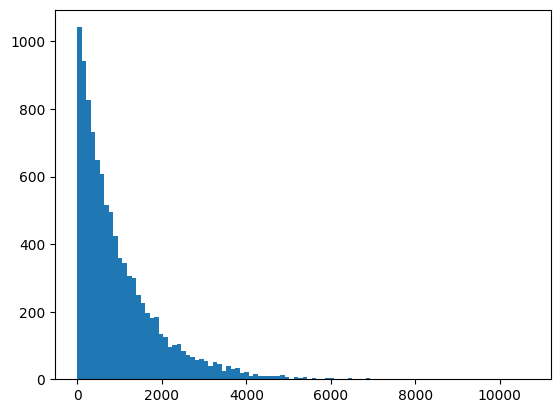

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

prob = []
for i in range(10000):
    prob.append(np.ceil(np.random.exponential(1000)))
    print(np.ceil(np.random.exponential(1000)))
plt.hist(prob,100)

print("mean:" + str(np.mean(prob)) +"\nmax:" + str(np.max(prob)))

# sns.distplot(np.random.exponential(size=1000000), hist=true)
